In [1]:
import pandas as pd
import seaborn as sns

In [3]:
datos = pd.read_csv('labMairas24.csv')

In [ ]:
datos.Maturity = datos.Maturity.str.strip()

In [4]:
datos

,Zone,TL,Weight,Sex,Maturity,Age
0,Atlàntic,24.0,83.33,F,M,1.5
1,Atlàntic,24.1,84.54,F,M,3.0
2,Atlàntic,25.0,92.06,F,M,1.5
3,Atlàntic,23.1,82.66,M,M,2.5
4,Atlàntic,26.6,103.07,F,M,5.0
...,...,...,...,...,...,...
147,Mediterrani,25.0,106.39,I,I,2.5
148,Mediterrani,20.0,49.08,I,I,1.0
149,Mediterrani,21.1,57.93,I,I,3.0
150,Mediterrani,20.1,53.05,I,I,3.5


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Zone      152 non-null    object 
 1   TL        152 non-null    float64
 2   Weight    152 non-null    float64
 3   Sex       152 non-null    object 
 4   Maturity  152 non-null    object 
 5   Age       152 non-null    float64
dtypes: float64(3), object(3)
memory usage: 7.2+ KB


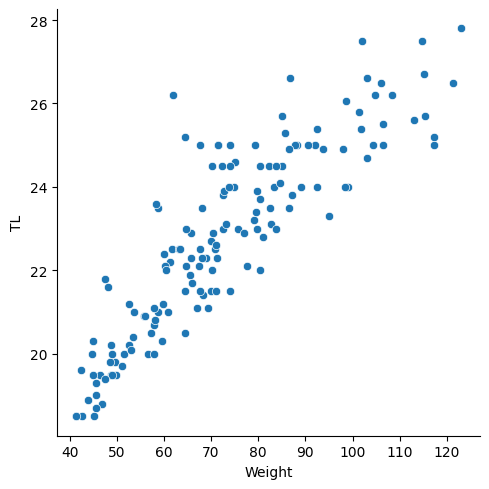

In [6]:
sns.relplot(data=datos, x='Weight', y='TL')

<AxesSubplot: xlabel='Weight', ylabel='TL'>

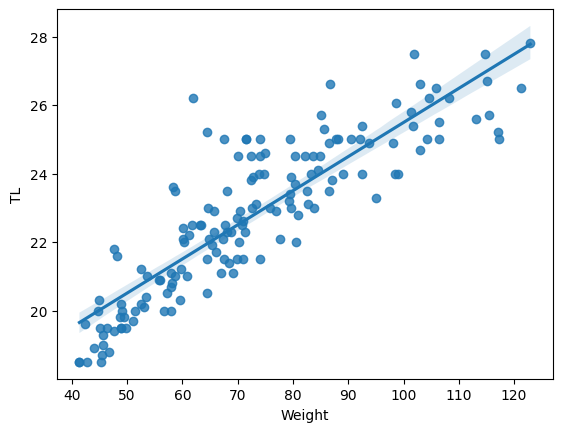

In [8]:
sns.regplot(data=datos, x='Weight', y='TL')

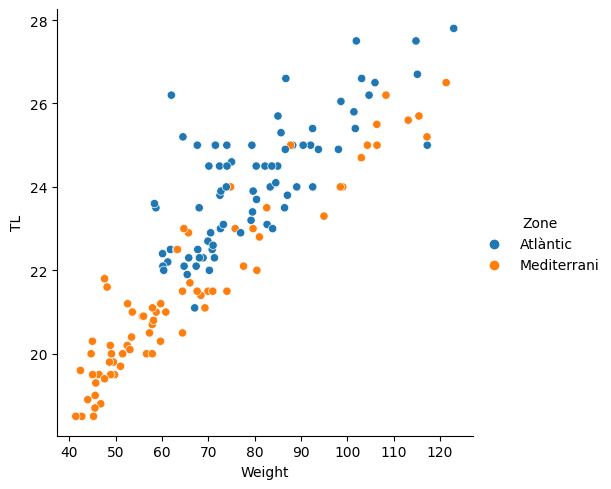

In [9]:
sns.relplot(data=datos, 
            x='Weight', 
            y='TL',
            hue='Zone')

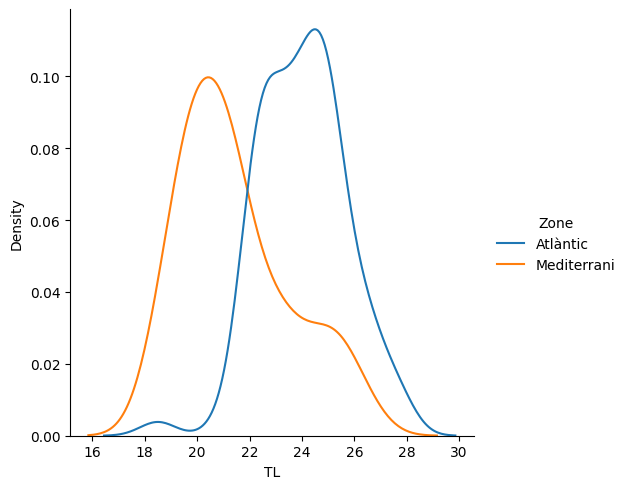

In [14]:
sns.displot(data=datos, 
            x='TL', 
            kind='kde', 
            hue='Zone')

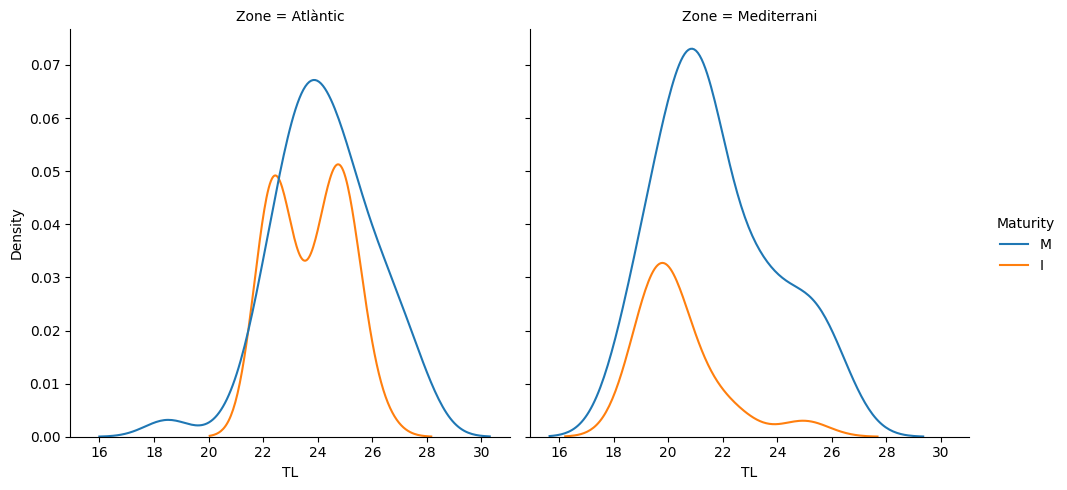

In [19]:
sns.displot(data=datos, 
            x='TL', 
            kind='kde', 
            hue='Maturity',
            col='Zone')

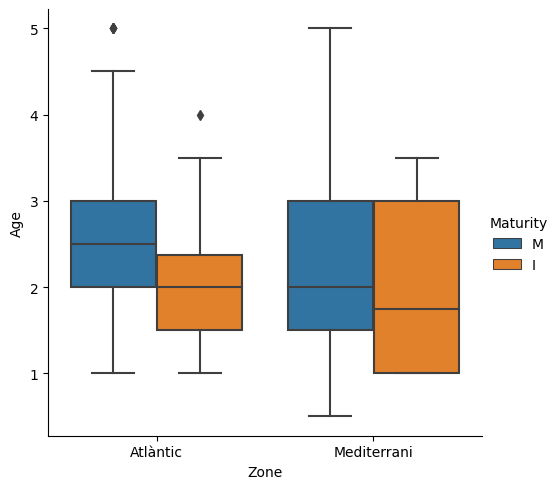

In [23]:
sns.catplot(data=datos, x='Zone', y='Age', hue='Maturity', kind='box')